### Bài 1: Xem lại công thức tính node trong hidden layer, biếu diễn bài toán dưới dạng ma trận. Hiểu hết và chạy lại code (softmax, cross_entropy, batch update).

Với một node thứ $i$ bấy kỳ trong hidden layer thứ $k$, ta có công thức tính node như sau:

$
\displaystyle z_i^{(k)} = b_i^{(k)} + \sum_j^{l^{(k-1)}} (a_j^{(k-1)} * w_{ji}^{(k)}) \;\;\;\;\;\;\; (1)
$

Và $\displaystyle a_i^{(k)} = \sigma(z_i^{(k)})$ với $\sigma$ là hàm kích hoạt

Ghép các $z_i^{(k)}$ và $a_i^{(k)}$ của hidden layer thứ k vào với nhau, ta thu được vector

$\displaystyle z^{(k)} = \begin{bmatrix} z_1^{(k)} \\  z_2^{(k)} \\ z_3^{(k)} \\ ... \\ z_{l^{(k)}}^{(k)}\end{bmatrix} 
\quad \text{and} \quad
 a^{(k)} = \begin{bmatrix} a_1^{(k)} \\  a_2^{(k)} \\ a_3^{(k)} \\ ... \\ a_{l^{(k)}}^{(k)}\end{bmatrix}$

Thêm vào đó, ta có vector hệ số bias và ma trận trọng số cho hidden layer thứ k

$\displaystyle b^{(k)} = 
\begin{bmatrix} 
b_1^{(k)} \\  b_2^{(k)} \\ b_3^{(k)} \\ ... \\ b_{l^{(k)}}^{(k)} 
\end{bmatrix}
\quad \textrm{and} \quad 
W^{(k)} = 
\begin{bmatrix} 
w_{11}^{(k)} && w_{12}^{(k)} && ... && w_{1l^{(k)}}^{(k)} \\  
w_{21}^{(k)} && w_{22}^{(k)} && ... && w_{2l^{(k)}}^{(k)} \\ 
... && ... && ... && ... \\ w_{l^{(k-1)}1}^{(k)} && w_{l^{(k-1)}2}^{(k)} && ... && w_{l^{(k-1)}l^{(k)}}^{(k)} 
\end{bmatrix}$


Thay công thức (1) vào biểu thức của vector $z^{(k)}$, ta có công thức tương đương

$\displaystyle z^{(k)} = 
\begin{bmatrix} 
z_1^{(k)} \\  z_2^{(k)} \\ z_3^{(k)} \\ ... \\ z_{l^{(k)}}^{(k)}
\end{bmatrix} 
= \begin{bmatrix}
b_1^{(k)} + \sum_i^{l^{(k-1)}} a_{i}^{(k)}w_{i1}^{(k)} \\ 
b_2^{(k)} + \sum_i^{l^{(k-1)}} a_{i}^{(k)}w_{i2}^{(k)} \\
b_3^{(k)} + \sum_i^{l^{(k-1)}} a_{i}^{(k)}w_{i3}^{(k)} \\
... \\
b_{l^{(k)}}^{(k)} + \sum_i^{l^{(k-1)}} a_{i}^{(k)}w_{il^{(k)}}^{(k)}
\end{bmatrix}
= b^{(k)} + W^{(k).T} * a^{(k-1)} \;\;\;\;\;\; (2)
$

Nếu $k = 1$ thì $a^0 = x$ là vector dữ liệu đầu vào

Công thứ (2) chính là công thức để tính đầu vào của một hidden layer thứ k khi đã biết đầu ra của layer trước đó dựa theo một datapoint nào đó.

Tiếp theo, để tính toán trên toàn bộ dữ liệu, ta ghép toàn bộ các datapoint thành một ma trận X. Gọi $d$ là số chiều dữ liệu và $N$ là số sample

$\displaystyle
X = 
\begin{bmatrix}
x_1^{[1]} && x_2^{[1]} && ... && x_d^{[1]} \\
x_1^{[2]} && x_2^{[2]} && ... && x_d^{[2]} \\
... && ... && ... && ... \\
x_1^{[N]} && x_2^{[N]} && ... && x_d^{[N]}
\end{bmatrix}
= \begin{bmatrix}
x^{[1].T} \\
x^{[2].T} \\
...\\
x^{[N].T} \\
\end{bmatrix} 
$


Tương tự, các vector $z^{[i](k)}$ là vector $z^{(k)}$ ứng với datapoint thứ i cũng được gộp chung thành một ma trận $Z^{(k)}$

$\displaystyle
Z^{(k)} =
\begin{bmatrix}
z_1^{[1](k)} && z_2^{[1](k)} && ... && z_{l^{(k)}}^{[1](k)} \\
z_1^{[2](k)} && z_2^{[2](k)} && ... && z_{l^{(k)}}^{[2](k)} \\
... && ... && ... && ...\\
z_1^{[N](k)} && z_2^{[N](k)} && ... && z_{l^{(k)}}^{[N](k)} \\
\end{bmatrix}
=\begin{bmatrix}
z^{[1](k).T} \\
z^{[2](k).T} \\
... \\
z^{[N](k).T}
\end{bmatrix} \;\;\;\;\;\; (3)
$

Giống như $Z$, các vector $a^{[i](k)}$ là vector $a^{(k)}$ ứng với datapoint thứ i cũng được gộp chung thành một ma trận $A^{(k)}$

$\displaystyle
A^{(k)} =
\begin{bmatrix}
a_1^{[1](k)} && a_2^{[1](k)} && ... && a_{l^{(k)}}^{[1](k)} \\
a_1^{[2](k)} && a_2^{[2](k)} && ... && a_{l^{(k)}}^{[2](k)} \\
... && ... && ... && ...\\
a_1^{[N](k)} && a_2^{[N](k)} && ... && a_{l^{(k)}}^{[N](k)} \\
\end{bmatrix}
=\begin{bmatrix}
a^{[1](k).T} \\
a^{[2](k).T} \\
... \\
a^{[N](k).T}
\end{bmatrix}
$


Dựa theo công thức (2), ta có:

$\displaystyle z^{[i](k).T} 
= b^{(k).T} +  a^{[i](k-1).T} * w^{(k)} \;\;\;\;\;\; (4)
$

Thay (4) vào (3), ta có:

$\displaystyle
Z^{(k)}
=\begin{bmatrix}
z^{[1](k).T} \\
z^{[2](k).T} \\
... \\
z^{[N](k).T}
\end{bmatrix}
= \begin{bmatrix}
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)} \\
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)} \\
... \\
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)}
\end{bmatrix}
= A^{(k-1)}*W^{(k)} + b^{(k)} \;\;\;\;\;\; (5)
$

Công thức (5) kết hợp với $A^{(k)} = \sigma(Z^{(k)})$ tạo thành công thức của mạng Neuron

**Chạy lại code**

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
batch_size = 128  # Kích thước batch
num_classes = 10  # 10 lớp
epochs = 12       # Số epoches

In [ ]:
# kích thước ảnh
img_rows, img_cols = 28, 28

# split data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Kích thước đầu vào (ảnh đen trắng)
X_train[0].shape

(28, 28)

In [ ]:
# Flatten. Datapoint is row
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.reshape(-1, 784)
X_test = X_test.astype('float32')

# normalize (0-1)
X_train /= 255
X_test /= 255
print('Train samples: \t', X_train.shape[0])
print('Test samples: \t', X_test.shape[0])

Train samples: 	 60000
Test samples: 	 10000


In [ ]:
# convert to one-hot encoding (binary class matrices)
print(y_train[0])
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

# input shape
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [ ]:
H = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, # log or not
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 16s 4ms/step - loss: 1.7573 - accuracy: 0.4681 - val_loss: 0.5749 - val_accuracy: 0.8654
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.8664 - val_loss: 0.3863 - val_accuracy: 0.8988
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8937 - val_loss: 0.3263 - val_accuracy: 0.9134
Epoch 4/12
469/469 [==============================] - 2s 3ms/step - loss: 0.3340 - accuracy: 0.9065 - val_loss: 0.2943 - val_accuracy: 0.9197
Epoch 5/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2979 - accuracy: 0.9152 - val_loss: 0.2721 - val_accuracy: 0.9249
Epoch 6/12
469/469 [==============================] - 2s 3ms/step - loss: 0.2713 - accuracy: 0.9227 - val_loss: 0.2547 - val_accuracy: 0.9295
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2599 - accuracy: 0.9268 - val_loss: 0.2392 - val_accuracy: 0.9327
Epoch

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: \t', score[0])
print('Test accuracy: \t', score[1])

Test loss: 	 0.19384276866912842
Test accuracy: 	 0.9449999928474426


Text(0.5, 1.0, 'Loss')

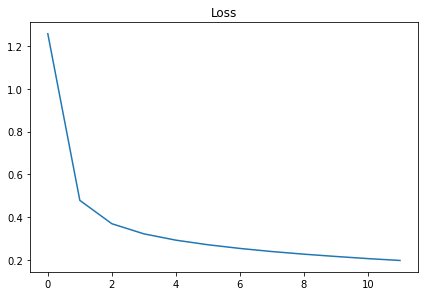

In [ ]:
plt.plot(H.history['loss'])
plt.tight_layout()
plt.title('Loss')

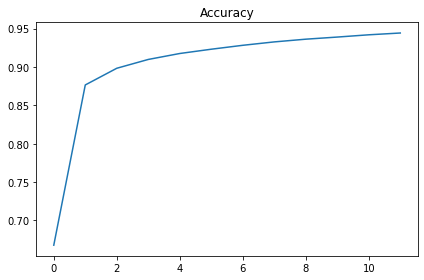

In [ ]:
plt.plot(H.history['accuracy'])
plt.title('Accuracy')
plt.tight_layout()

Text(0.5, 1.0, 'Val Accuracy')

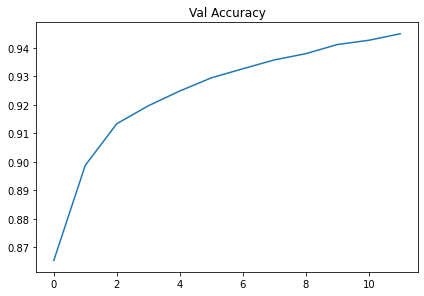

In [ ]:
plt.plot(H.history['val_accuracy'])
plt.tight_layout()
plt.title('Val Accuracy')

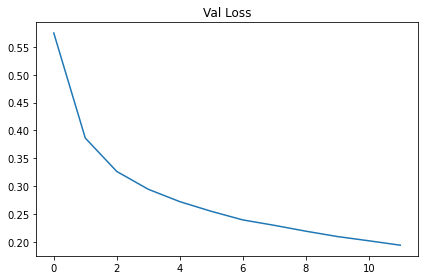

In [ ]:
plt.plot(H.history['val_loss'])
plt.title('Val Loss')
plt.tight_layout()

### Bài 2: Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.


Learning rate = 0.001000

Learning rate = 0.005000

Learning rate = 0.010000

Learning rate = 0.050000

Learning rate = 0.100000


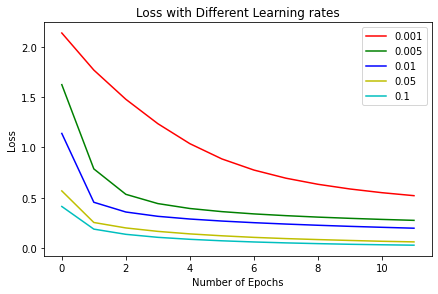

In [ ]:
# Thử với các learning rate khác nhau (giữ nguyên các layer, node và activation function)
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1]
colors = ['r', 'g', 'b', 'y', 'c']
for i, lr in enumerate(learning_rate):
  model = Sequential()
  
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(learning_rate=lr),
                metrics=['accuracy'])
  print('\nLearning rate = %f' %(lr))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


Activation function = sigmoid

Activation function = tanh

Activation function = relu

Activation function = softmax

Activation function = linear


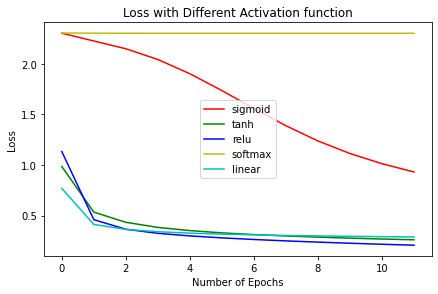

In [ ]:
# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
for i, af in enumerate(activation_function):
  model = Sequential()
  
  model.add(Dense(512, activation=af, input_shape=(784,)))
  model.add(Dense(32, activation=af))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])
  print('\nActivation function = %s' %(af))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

Number of hidden layer = 0
Number of hidden layer = 1
Number of hidden layer = 2
Number of hidden layer = 3
Number of hidden layer = 4


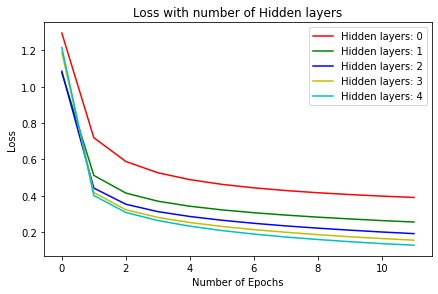

In [ ]:
# Thay đổi số layer
nodes = [
         [],
         [624],
         [624, 151],
         [624, 151, 80],
         [624, 151, 80, 32]
]
for i, node in enumerate(nodes): # i vừa là index, vừa là số hiden layer
  model = Sequential()
  # hidden layer 1
  if len(node) >= 1:
    model.add(Dense(node[0], activation='relu', input_shape=(784,)))

  # hidden layer 2 -> i
  for i in range(2, i+1):
    model.add(Dense(node[i-1], activation='relu'))

  # output
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])
  print('Number of hidden layer = %d' %(i))
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with number of Hidden layers')
plt.legend([("Hidden layers: " + str(len(node))) for node in nodes])
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

Node list: [50, 40, 30, 20]
Node list: [250, 140, 130, 50]
Node list: [400, 320, 151, 60]
Node list: [624, 480, 320, 80]
Node list: [1000, 850, 780, 100]


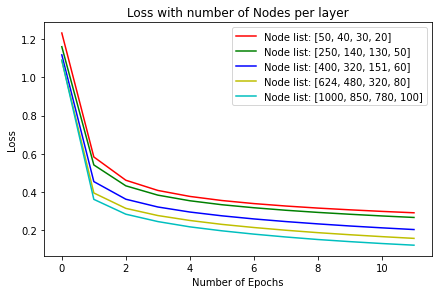

In [ ]:
# Thay đổi số node trong mỗi layer
nodes = [
         [50, 40, 30, 20],
         [250, 140, 130, 50],
         [400, 320, 151, 60],
         [624, 480, 320, 80],
         [1000, 850, 780, 100]
]
for i, node in enumerate(nodes): # i vừa là index, vừa là số hiden layer
  model = Sequential()
  # hidden layer 1
  if len(node) >= 1:
    model.add(Dense(node[0], activation='relu', input_shape=(784,)))

  # hidden layer 2 -> i
  for i in range(2, i+1):
    model.add(Dense(node[i-1], activation='relu'))

  # output
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer=SGD(),
                metrics=['accuracy'])
  print('Node list:', node)
  H = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs = epochs,
                verbose=0,
                validation_data=(X_test, y_test))
  plt.plot(H.history['loss'], colors[i])
  
plt.title('Loss with number of Nodes per layer')
plt.legend([("Node list: " + str(node)) for node in nodes])
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()

### Bài 3: Phân loại ảnh trong dữ liệu cifar10

In [ ]:
# Tham số
batch_size = 512
epochs = 300
number_classes = 10
image_size = (32, 32)

In [ ]:
# load data (ảnh màu)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
# preprocessing data
X_train = X_train.reshape(-1, 3072) # 32 * 32 * 3
X_test = X_test.reshape(-1, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize data to (0, 1)
X_train /= 255
X_test /= 255

print('Training size: \t', X_train.shape[0])
print('Test size: \t', X_test.shape[0])

Training size: 	 50000
Test size: 	 10000


In [ ]:
# convert y to one-hot encoding
print(y_train[0])
y_train = np_utils.to_categorical(y_train, number_classes)
y_test = np_utils.to_categorical(y_test, number_classes)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
X_train[0].shape

(3072,)

In [ ]:
model = Sequential()

model.add(Dense(1000, activation='relu', input_shape=(3072,)))
model.add(Dense(612, activation='relu'))
model.add(Dense(151, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(number_classes, activation='softmax'))

model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_67 (Dense)             (None, 612)               612612    
_________________________________________________________________
dense_68 (Dense)             (None, 151)               92563     
_________________________________________________________________
dense_69 (Dense)             (None, 60)                9120      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                610       
Total params: 3,787,905
Trainable params: 3,787,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

H = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(X_test, y_test))

Epoch 1/300
98/98 [==============================] - 2s 11ms/step - loss: 2.2251 - accuracy: 0.1692 - val_loss: 2.0348 - val_accuracy: 0.2707
Epoch 2/300
98/98 [==============================] - 1s 8ms/step - loss: 1.9984 - accuracy: 0.2886 - val_loss: 1.9256 - val_accuracy: 0.3135
Epoch 3/300
98/98 [==============================] - 1s 7ms/step - loss: 1.9039 - accuracy: 0.3242 - val_loss: 1.8703 - val_accuracy: 0.3352
Epoch 4/300
98/98 [==============================] - 1s 7ms/step - loss: 1.8637 - accuracy: 0.3404 - val_loss: 1.8109 - val_accuracy: 0.3621
Epoch 5/300
98/98 [==============================] - 1s 7ms/step - loss: 1.8177 - accuracy: 0.3604 - val_loss: 1.7745 - val_accuracy: 0.3733
Epoch 6/300
98/98 [==============================] - 1s 7ms/step - loss: 1.7802 - accuracy: 0.3762 - val_loss: 1.7637 - val_accuracy: 0.3808
Epoch 7/300
98/98 [==============================] - 1s 7ms/step - loss: 1.7585 - accuracy: 0.3803 - val_loss: 1.7277 - val_accuracy: 0.3960
Epoch 8/300


Text(0.5, 1.0, 'Loss change')

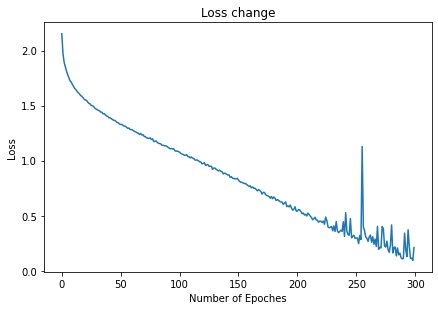

In [ ]:
plt.plot(H.history['loss'])
plt.tight_layout()
plt.xlabel('Number of Epoches')
plt.ylabel('Loss')
plt.title('Loss change')

Text(0.5, 1.0, 'Validation Loss change')

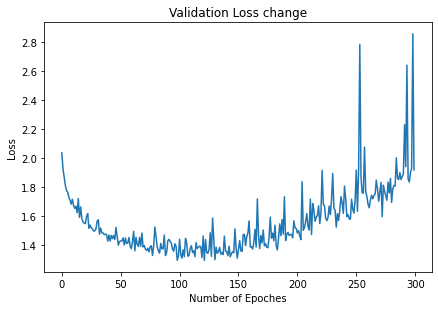

In [ ]:
plt.plot(H.history['val_loss'])
plt.tight_layout()
plt.xlabel('Number of Epoches')
plt.ylabel('Loss')
plt.title('Validation Loss change')

Text(0.5, 1.0, 'Accuracy change')

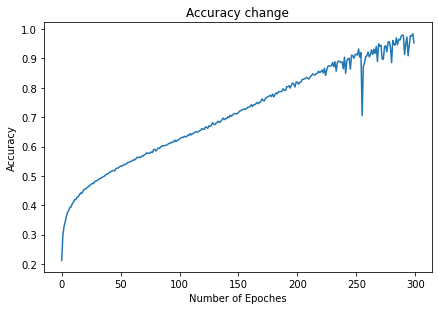

In [ ]:
plt.plot(H.history['accuracy'])
plt.tight_layout()
plt.xlabel('Number of Epoches')
plt.ylabel('Accuracy')
plt.title('Accuracy change')

Text(0.5, 1.0, 'Validation Accuracy change')

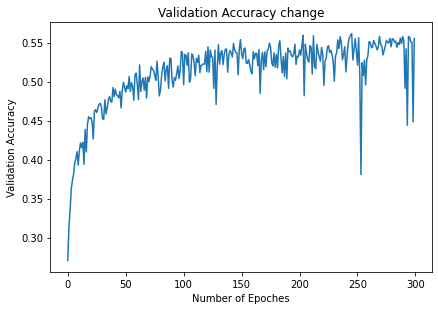

In [ ]:
plt.plot(H.history['val_accuracy'])
plt.tight_layout()
plt.xlabel('Number of Epoches')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy change')

In [ ]:
# Evaluate
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss: \t', score[0])
print('Test accuracy: \t', score[1])

Test loss: 	 1.9170368909835815
Test accuracy: 	 0.5551000237464905


### Bài 4: Code feedforward bằng numpy và kiểm tra tính chính xác của hàm bằng model tương ứng keras, có thể khởi tạo weight, bias trong layer bằng 1 trong keras, rồi so sánh với code mình implement xem output giống nhau không? (https://github.com/keras-team/keras/issues/1671..., set weight cho từng layer giống với code mọi người implement). Hoặc thử dùng linear activation, w = b = 1 xem tính đúng chưa?

Công thức feedforward

$\displaystyle
\begin{cases}
Z^{(k)}
=\begin{bmatrix}
z^{[1](k).T} \\
z^{[2](k).T} \\
... \\
z^{[N](k).T}
\end{bmatrix}
= \begin{bmatrix}
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)} \\
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)} \\
... \\
b^{(k).T} +  a^{[i](k-1).T} * W^{(k)}
\end{bmatrix}
= A^{(k-1)}*W^{(k)} + b^{(k)} \;\;\;\;\;\; & \color{red}{(5)} \\
A^{(k)} = \sigma(Z^{(k)}) & \color{red}{(6)}
\end{cases} $

In [ ]:
import numpy as np

# Có N sample, mỗi sample có d feature

def linear(X):
  return X

# A có shape (N, l_(k-1))
# W có shape (l_(k-1), l_k)
# b có shape (N, l_k)
def feedForwardLayer(A, W, b, sigma):
  return sigma(A @ W + b)

def feedForward(X, node_per_hl, W_list, b_list, activation_function):
  # node_per_hl: so luong node theo hidden layer, hidden layer cuoi la output layer
  # W_list: danh sach trong so cua moi hl
  # b_list: danh sach bias
  # activation_function: ham kich hoat tren cac hidden layer

  number_hl = len(node_per_hl)
  A_prev = X
  A_next = X
  for i in range(number_hl):
      A_next = feedForwardLayer(A_prev, W_list[i], b_list[i], activation_function)
      A_prev = A_next
     
  return A_next

In [ ]:
np.random.seed(21)
X = np.random.randn(1000, 10)  # N = 1000, d = 10
nodes = [300, 120, 50, 10]    # kích thước mỗi hidden layer

W_list = []
W_list.append(np.ones((10, 300)))
W_list.append(np.ones((300, 120)))
W_list.append(np.ones((120, 50)))
W_list.append(np.ones((50, 10)))

b_list = []
b_list.append(np.ones(300).reshape(1, -1))
b_list.append(np.ones(120).reshape(1, -1))
b_list.append(np.ones(50).reshape(1, -1))
b_list.append(np.ones(10).reshape(1, -1))

# Kết quả của hàm feed forward
output1 = feedForward(X, nodes, W_list, b_list, linear)

In [ ]:
model = Sequential()

model.add(Dense(300, activation='linear', input_shape=(10,)))
model.add(Dense(120, activation='linear'))
model.add(Dense(50, activation='linear'))
model.add(Dense(10, activation='linear'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 300)               3300      
_________________________________________________________________
dense_76 (Dense)             (None, 120)               36120     
_________________________________________________________________
dense_77 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_78 (Dense)             (None, 10)                510       
Total params: 45,980
Trainable params: 45,980
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# set weights
model.layers[0].set_weights([W_list[0], b_list[0].reshape(-1)])
model.layers[1].set_weights([W_list[1], b_list[1].reshape(-1)])
model.layers[2].set_weights([W_list[2], b_list[2].reshape(-1)])
model.layers[3].set_weights([W_list[3], b_list[3].reshape(-1)])

In [ ]:
output2 = model.predict(X)

In [ ]:
# Output của hàm Feed Forward
output1 

array([[  602415.38132381,   602415.38132381,   602415.38132381, ...,
          602415.38132381,   602415.38132381,   602415.38132381],
       [ 3847575.36480427,  3847575.36480427,  3847575.36480427, ...,
         3847575.36480427,  3847575.36480427,  3847575.36480427],
       [-5408941.49850446, -5408941.49850446, -5408941.49850446, ...,
        -5408941.49850446, -5408941.49850446, -5408941.49850446],
       ...,
       [ 7630685.14180918,  7630685.14180918,  7630685.14180918, ...,
         7630685.14180918,  7630685.14180918,  7630685.14180918],
       [ 5241548.58863227,  5241548.58863227,  5241548.58863227, ...,
         5241548.58863227,  5241548.58863227,  5241548.58863227],
       [  370280.54279128,   370280.54279128,   370280.54279128, ...,
          370280.54279128,   370280.54279128,   370280.54279128]])

In [ ]:
# Output của model
output2

array([[  602415.4 ,   602415.4 ,   602415.4 , ...,   602415.4 ,
          602415.4 ,   602415.4 ],
       [ 3847575.  ,  3847575.  ,  3847575.  , ...,  3847575.  ,
         3847575.  ,  3847575.  ],
       [-5408945.  , -5408945.  , -5408945.  , ..., -5408945.  ,
        -5408945.  , -5408945.  ],
       ...,
       [ 7630683.  ,  7630683.  ,  7630683.  , ...,  7630683.  ,
         7630683.  ,  7630683.  ],
       [ 5241546.5 ,  5241546.5 ,  5241546.5 , ...,  5241546.5 ,
         5241546.5 ,  5241546.5 ],
       [  370280.56,   370280.56,   370280.56, ...,   370280.56,
          370280.56,   370280.56]], dtype=float32)

**Kết luận:** Do output1 và output2 là giống nhau nên có thể nói là hàm feedForward đã tính toán chính xác.

In [1]:
import numpy as np

In [2]:
x = np.array([1.0])

In [3]:
x.dtype

dtype('float64')